In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinical_data.head()
# Combine the data into a single dataset
combined = pd.merge(clinical_data, mouse_data, on = 'Mouse ID')

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_group = combined.groupby(['Timepoint', 'Drug']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_group).reset_index()

mean_tumor_df.head()
# Preview DataFrame


,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,45.0
1,0,Ceftamin,45.0
2,0,Infubinol,45.0
3,0,Ketapril,45.0
4,0,Naftisol,45.0


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_df = combined.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
se_tumor_df = pd.DataFrame(se_tumor_df).reset_index()
# Preview DataFrame
se_tumor_df.head()
se_tumor_cast = se_tumor_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

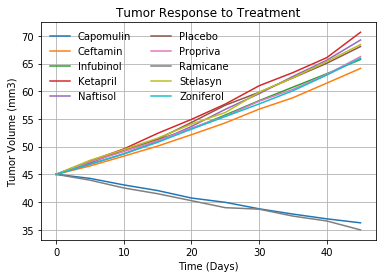

In [25]:
# Minor Data Munging to Re-Format the Data Frames
mean_cast = mean_tumor_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_plot = mean_cast.plot()
mean_plot.legend(ncol = 2, loc = 'upper left', framealpha = 0)
mean_plot.grid()
mean_plot.set_xlabel('Time (Days)')
mean_plot.set_ylabel('Tumor Volume (mm3)')
mean_plot.set_title('Tumor Response to Treatment')
mean_cast['Capomulin']

AttributeError: 'PathCollection' object has no attribute 'show'

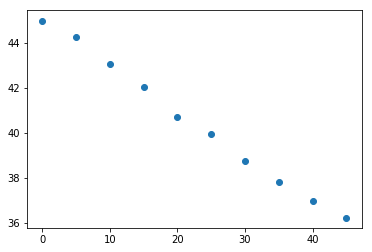

In [37]:
test = plt.scatter(mean_cast.index, mean_cast['Capomulin'])
test.show()

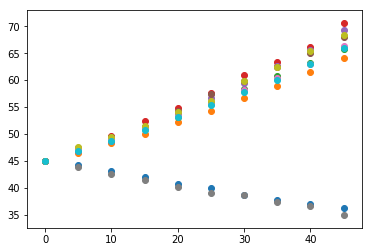

In [27]:
tumor_figs = {}
tumor_axs = {}
for drug in enumerate(mean_cast):
    tumor_figs['{0}_plot'.format(drug)] = plt.figure()
    tumor_axs = plt.scatter(mean_cast.index, mean_cast[drug])

In [35]:
tumor_dictionary['Capomulin_plot']

TypeError: scatter() missing 1 required positional argument: 'y'

In [90]:
# Generate the Plot (with Error Bars)
# tumor_plot = plt.scatter(mean_cast['Timepoint'], mean_cast['Tumor Volume (mm3)'])
# Save the Figure

mean_cast.columns

MultiIndex(levels=[['Tumor Volume (mm3)', 'Timepoint'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol', '']],
           labels=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])

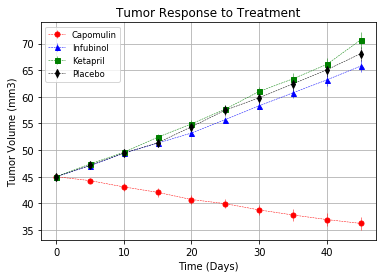

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


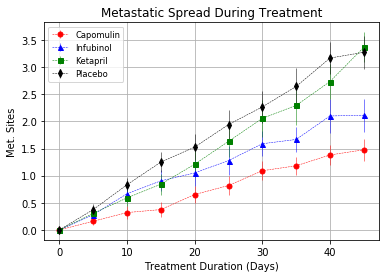

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

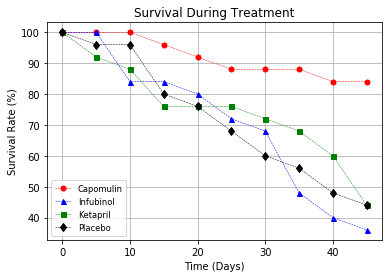

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

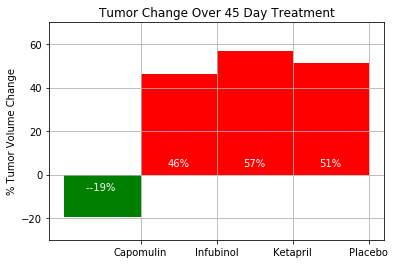